In [18]:
# Author: Roi Yehoshua <roiyeho@gmail.com>
# License: MIT

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1. Loading the data set

In [19]:
# You can directly pass the URL of a csv to read_csv()
# When viewing a .csv on GitHub, make sure it's in the raw format
url = 'https://raw.githubusercontent.com/roiyeho/ml-book/main/Chapter03/data/heart-disease.csv'
df = pd.read_csv(url)

2. Data Exploration

In [20]:
# Check the first 5 rows of the data
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [23]:
# All features are numerical and there are no missing values
# However, there are features with different scales

3. Prepare the Data

In [5]:
# Create X (all columns except target)
X = df.drop('target', axis=1)

# Create y (only the target column)
y = df['target']

In [ ]:
# Check if the class labels are balanced
y.value_counts()

In [6]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# View the different shapes of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 13), (76, 13), (227,), (76,))

4. Build a classification model

In [7]:
from sklearn.linear_model import LogisticRegression

# Instantiate an instance of the model
clf = LogisticRegression(max_iter=1000)

# Fit the model to the training data
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

5. Evaluate the model

In [8]:
# Evaluate the fitted model on the training set
clf.score(X_train, y_train)

0.8502202643171806

In [9]:
# Evaluate the fitted model on the test set
clf.score(X_test, y_test)

0.8289473684210527

6. Experiment with different models

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

# Create a dictionary containing the classification models
models = {
    'LogisticRegression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),    
    'RandomForestClassifier': RandomForestClassifier(),
    'LinearSVC': LinearSVC(),
    'MLPClassifier': MLPClassifier()
}

In [11]:
np.random.seed(0) # for reproducibility

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    results[model_name] = model.score(X_test, y_test)
    
results

C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\roi_y\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'LogisticRegression': 0.8421052631578947,
 'KNN': 0.6447368421052632,
 'RandomForestClassifier': 0.868421052631579,
 'LinearSVC': 0.6710526315789473,
 'MLPClassifier': 0.8026315789473685}

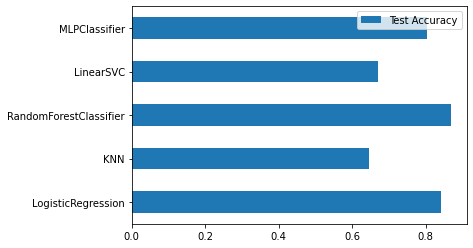

In [12]:
# Create a bar plot of the results
results_df = pd.DataFrame(results.values(), results.keys(), columns=['Test Accuracy'])
results_df.plot.barh();

Hyperparameter Tuning